In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Generate true distributions of weekly hospital orders

In [7]:
NUM_HOSPITALS = 10
N_SAMPLES = 10
random.seed(50)

Hospital 1: 50, 12.940877650206456
Hospital 2: 100, 16.29786787464858
Hospital 3: 150, 12.356045919698925
Hospital 4: 200, 3.0445135602639217
Hospital 5: 250, 17.234654883747602
Hospital 6: 300, 4.6796206856689055
Hospital 7: 350, 24.51334846273386
Hospital 8: 400, 5.535255682838904
Hospital 9: 450, 8.894060669206578
Hospital 10: 500, 15.579861002361863


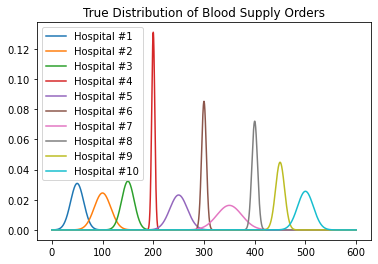

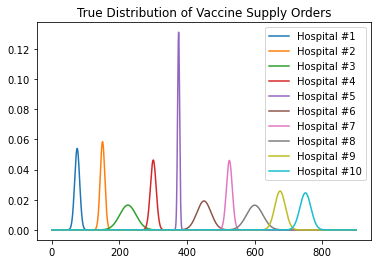

In [8]:
# https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8

blood_distrs = list()
vaccine_distrs = list()

# denotes the x-axis range
blood_data = np.arange(0, 600, 0.01)
vaccine_data = np.arange(0, 900, 0.01)

fig_blood, ax_blood = plt.subplots()
fig_vaccine, ax_vaccine = plt.subplots()

for i in range(1, NUM_HOSPITALS+1):
  mu_blood, sigma_blood = i*50, random.uniform(1, 25)
  mu_vaccine, sigma_vaccine = i*75, random.uniform(1, 25)

  print(f'Hospital {i}: {mu_blood}, {sigma_blood}')
  blood_distrs.append(np.random.normal(mu_blood, sigma_blood, N_SAMPLES))
  vaccine_distrs.append(np.random.normal(mu_vaccine, sigma_vaccine, N_SAMPLES))

  ax_blood.plot(blood_data, norm.pdf(blood_data, scale=sigma_blood, loc=mu_blood), label=f"Hospital #{i}")
  ax_vaccine.plot(vaccine_data, norm.pdf(vaccine_data, scale=sigma_vaccine, loc=mu_vaccine), label=f"Hospital #{i}")

ax_blood.set_title('True Distribution of Blood Supply Orders')
ax_blood.legend(loc='best', frameon=True)

ax_vaccine.set_title('True Distribution of Vaccine Supply Orders')
ax_vaccine.legend(loc='best', frameon=True)

In [9]:
# creates 5 chunks-worth of data
# simply takes chunks of 200 entries from our normal distribution
# to view files, click on the left pane and click on the "Folder" icon at the bottom
for i in range(5):
  np.savetxt(f'{5-i}_weeks_ago.out', blood_distrs[0][200*i:200*(i+1)])


# creates an actual file in Google Drive
# alternate technique of saving to a file
# with open('/content/drive/My Drive/test.txt', 'w') as f:
#   f.write(np.array2string(blood_distrs[0][:200], separator='\n'))

In [10]:
# built-in function that allows us to find mean given a list of numbers
# (if we don't go with the Beta/ Dirichlet distribution)
mean, std = norm.fit(blood_distrs[0][200:400])

Generate grid, hospital locations, and dataset: 

In [11]:
MAX_DIM = 10
possible_points = [] 
for x in range(0, MAX_DIM + 1): 
  for y in range(0, MAX_DIM + 1): 
    curr_tuple = (x,y)
    possible_points.append(curr_tuple)
hospital_coords = random.sample(possible_points, NUM_HOSPITALS)
print(hospital_coords)

index_to_hospital = {} #hospitals start at 1, 0 refers to starting location [states list]
index_to_hospital[0] = (0,0)
for curr_index in range(1, NUM_HOSPITALS + 1): 
  index_to_hospital[curr_index] = hospital_coords[curr_index - 1]
print(index_to_hospital)

dataset = [] #(state, action, reward, next state)
state_list = list(range(0, NUM_HOSPITALS + 1))
print(state_list)
for curr_state in range(0, NUM_HOSPITALS + 1): 
  next_states = [x for x in state_list if x != curr_state]
  action = 1 #1-indexed like project 
  for next_state in next_states: 
    curr_location = np.array(index_to_hospital[curr_state])
    next_location = np.array(index_to_hospital[next_state])
    curr_reward = 1 / np.linalg.norm(curr_location - next_location) #Just based on distance for now 
    dataset.append([curr_state, action, curr_reward, next_state])
    action += 1 
print(dataset)



[(10, 7), (10, 8), (0, 8), (8, 0), (7, 0), (9, 6), (3, 9), (9, 2), (7, 5), (9, 7)]
{0: (0, 0), 1: (10, 7), 2: (10, 8), 3: (0, 8), 4: (8, 0), 5: (7, 0), 6: (9, 6), 7: (3, 9), 8: (9, 2), 9: (7, 5), 10: (9, 7)}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[[0, 1, 0.08192319205190406, 1], [0, 2, 0.07808688094430304, 2], [0, 3, 0.125, 3], [0, 4, 0.125, 4], [0, 5, 0.14285714285714285, 5], [0, 6, 0.09245003270420485, 6], [0, 7, 0.10540925533894598, 7], [0, 8, 0.10846522890932808, 8], [0, 9, 0.11624763874381928, 9], [0, 10, 0.08770580193070293, 10], [1, 1, 0.08192319205190406, 0], [1, 2, 1.0, 2], [1, 3, 0.09950371902099892, 3], [1, 4, 0.13736056394868904, 4], [1, 5, 0.13130643285972254, 5], [1, 6, 0.7071067811865475, 6], [1, 7, 0.13736056394868904, 7], [1, 8, 0.19611613513818404, 8], [1, 9, 0.2773500981126146, 9], [1, 10, 1.0, 10], [2, 1, 0.07808688094430304, 0], [2, 2, 1.0, 1], [2, 3, 0.1, 3], [2, 4, 0.12126781251816648, 4], [2, 5, 0.11704114719613057, 5], [2, 6, 0.4472135954999579, 6], [2, 7, 0.141421